Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Prática com Operações Pontuais e OpenCV

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


In [2]:
#abria a imagem
img = cv2.imread('data/t1.jpg',1)
#cv2_imshow(img)

In [3]:
#mostrando a imagem colorida
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
img_grayscale_basic_np = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic_cv2 = (R + G + B) / 3

img_grayscale_basic = np.array(img_grayscale_basic_cv2, dtype=np.uint8)

#No PC usar a seguinte forma de plotagem, para o Colab usar cv2_imshow(img)
cv2.imshow('img_grayscale_basic', img_grayscale_basic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# Aplicando conversão ponderada usando NumPy
wR = 0.299
wG = 0.587
wB = 0.114

img_grayscale_pondered_np = wR * img[:, :, 2] + wG * img[:, :, 1] + wB * img[:, :, 0]

#cv2
B, G, R = cv2.split(img)
img_grayscale_pondered_cv2 = R * wR + G * wG + B * wB

img_grayscale_pondered = np.array(img_grayscale_pondered_cv2, dtype=np.uint8)

#No PC usar a seguinte forma de plotagem, para o Colab usar cv2_imshow(img)
cv2.imshow('img_grayscale_basic', img_grayscale_pondered)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Histograma de uma imagem

Fazer o histograma de uma imagem

In [14]:
histogram = np.zeros(256)

height, width = img_grayscale_pondered_np.shape
for i in range(height):
    for j in range(width):
        pixel_value = int(img_grayscale_pondered_np[i, j])
        histogram[pixel_value] += 1

# Normalizar o histograma para que a soma seja igual a 269.0
histogram = histogram / np.sum(histogram) * 269.0



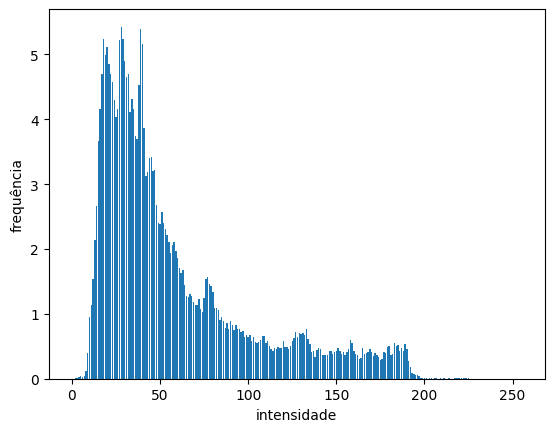

In [15]:
# Criar os valores do eixo x
x = np.linspace(0, 255, 256)

plt.bar(x, histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

Agora faça o histograma normalizado

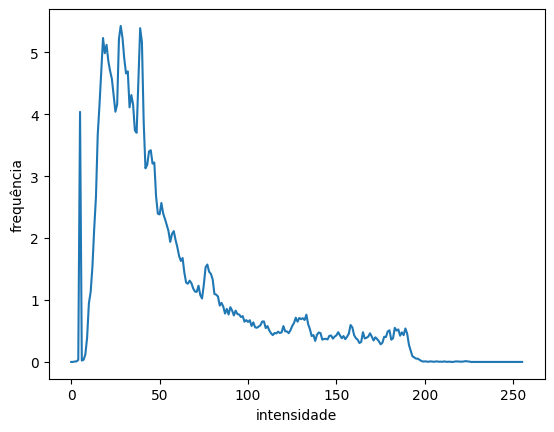

In [49]:
histogram_normalized = histogram / np.sum(histogram)
histogram[pixel_value] += 1

x = np.linspace(0, 255, 256)

plt.plot(x, histogram_normalized)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

## Transformações

Aplicar o conceito de transformação negativa em uma imagem. Cuide da questão de haver 3 bandas.

In [24]:
#negativo

img_in = cv2.imread('data/t1.jpg', 1)

img_negative_np = img_in.copy()

# Aplicar a transformação negativa em cada banda de cor
img_negative_np[:, :, 0] = 255 - img_in[:, :, 0]  # Banda Azul
img_negative_np[:, :, 1] = 255 - img_in[:, :, 1]  # Banda Verde
img_negative_np[:, :, 2] = 255 - img_in[:, :, 2]  # Banda Vermelha

# Converter para o tipo de dado uint8 para exibição
img_out = np.array(img_negative_np, dtype=np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


Aplicar o conceito de transformação logaritimica em uma imagem. Cuide da questão de haver 3 bandas.

In [52]:
#logaritimica

# Definir a constante de ajuste (pode ser ajustada conforme necessário)
c = 30

# Separar os canais de cor
B, G, R = cv2.split(img_in)

# Aplicar a transformação logarítmica em cada canal de cor
R_out = c * np.log(1 + R)
G_out = c * np.log(1 + G)
B_out = c * np.log(1 + B)

# Normalizar os valores para o intervalo de 0 a 255 (uint8)
R_out = np.clip(R_out, 0, 255).astype(np.uint8)
G_out = np.clip(G_out, 0, 255).astype(np.uint8)
B_out = np.clip(B_out, 0, 255).astype(np.uint8)

# Mesclar os canais de volta para formar a imagem de saída
img_out = cv2.merge((B_out, G_out, R_out))

# Normalizar os valores de intensidade
img_out = np.clip(img_out, 0, 255).astype(np.uint8)

print(img_out.max())
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\Pedaço\AppData\Local\Temp\ipykernel_5828\2678697226.py:10: RuntimeWarning: divide by zero encountered in log
  R_out = c * np.log(1 + R)


166


Aplicar o conceito de transformação de gamma em uma imagem. Cuide da questão de haver 3 bandas.

In [57]:
#gamma 
img_in = cv2.imread('data/t1.jpg')


# Definir a constante de ajuste, o valor do coeficiente de gama para cada canal de cor
c = 0.9  # Constante de ajuste
gamma_R = 0.3  # Coeficiente de gama para o canal vermelho
gamma_G = 0.3  # Coeficiente de gama para o canal verde
gamma_B = 0.3  # Coeficiente de gama para o canal azul

# Aplicar a transformação de gama em cada canal de cor separadamente
img_out_R = c * ((img_in[:, :, 2] / 255.0) ** gamma_R * 255).astype(np.uint8)  # Canal Vermelho
img_out_G = c * ((img_in[:, :, 1] / 255.0) ** gamma_G * 255).astype(np.uint8)  # Canal Verde
img_out_B = c * ((img_in[:, :, 0] / 255.0) ** gamma_B * 255).astype(np.uint8)  # Canal Azul

# Mesclar os canais de volta para formar a imagem de saída
img_out = cv2.merge((img_out_B, img_out_G, img_out_R))

# Normalizar os valores de intensidade
img_out = np.clip(img_out, 0, 255).astype(np.uint8)

# Exibir a intensidade máxima após a transformação
print('Intensidade máxima após a transformação de gama:', img_out.max())

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Intensidade máxima após a transformação de gama: 229


Aplicar o conceito de transformação de alargamento de contraste em uma imagem. Cuide da questão de haver 3 bandas.

In [36]:
#alargamento de contraste
img_in = cv2.imread('data/t1.jpg')

# Inicializar a imagem de saída com as mesmas dimensões que a imagem de entrada
img_out = np.zeros_like(img_in)

# Aplicar alargamento de contraste em cada canal de cor separadamente
for i in range(3):  # 3 canais de cor: B, G, R
    min_val = np.min(img_in[:, :, i])
    max_val = np.max(img_in[:, :, i])
    img_out[:, :, i] = 255 * ((img_in[:, :, i] - min_val) / (max_val - min_val))

# Converter para o tipo de dado uint8 para exibição
img_out = np.array(img_out, dtype=np.uint8)

# Exibir a imagem de entrada e a imagem após o alargamento de contraste
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


Aplicar o conceito de transformação de contraste e brilho em uma imagem. Cuide da questão de haver 3 bandas.

In [40]:
img_in = cv2.imread('data/t1.jpg')

# Definir os valores de contraste (a) e brilho (b) para cada canal de cor separadamente
a_red, b_red = 1.2, 30  # Para o canal vermelho
a_green, b_green = 1.5, 40  # Para o canal verde
a_blue, b_blue = 1.2, 30  # Para o canal azul

# Aplicar a transformação de contraste e brilho em cada canal de cor separadamente
img_out_red = np.clip(a_red * img_in[:, :, 2] + b_red, 0, 255).astype(np.uint8)  # Canal Vermelho
img_out_green = np.clip(a_green * img_in[:, :, 1] + b_green, 0, 255).astype(np.uint8)  # Canal Verde
img_out_blue = np.clip(a_blue * img_in[:, :, 0] + b_blue, 0, 255).astype(np.uint8)  # Canal Azul

# Mesclar os canais de volta para formar a imagem de saída
img_out = cv2.merge((img_out_blue, img_out_green, img_out_red))

# Exibir a imagem de entrada e a imagem após a transformação
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar em uma imagem. Cuide da questão de haver 3 bandas.

In [59]:
#limiar
img_in = cv2.imread('data/t1.jpg')

limiar_r = 150  # Limiar para o canal vermelho
limiar_g = 100  # Limiar para o canal verde
limiar_b = 50   # Limiar para o canal azul

img_out = cv2.inRange(img_in, (limiar_b, limiar_g, limiar_r), (255, 255, 255))

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar com fatiamento de plano em uma imagem. Cuide da questão de haver 3 bandas.

In [47]:
#limiar (com fatiamento por plano)
img_in = cv2.imread('data/t1.jpg')

# Definindo os limiares para cada banda (canal de cor)
limiar_r = 150  # Limiar para o canal vermelho
limiar_g = 100  # Limiar para o canal verde
limiar_b = 50   # Limiar para o canal azul

# Criando máscaras de limiar para cada banda
mask_r = (img_in[:, :, 2] > limiar_r).astype(np.uint8) * 255  # Canal vermelho
mask_g = (img_in[:, :, 1] > limiar_g).astype(np.uint8) * 255  # Canal verde
mask_b = (img_in[:, :, 0] > limiar_b).astype(np.uint8) * 255  # Canal azul

# Combinando as máscaras para criar a imagem de saída
img_out = cv2.merge((mask_b, mask_g, mask_r))

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()